In [1]:
from Utils import get_paths,get_inter_pos_frames
import sklearn
import numpy as np
import copy
file_name = get_paths('Data/')[:2]
file_name2 = get_paths('Data/')[3:5]

In [2]:
get_paths('Data/')

['Data/151507_preprocessed.h5',
 'Data/151508_preprocessed.h5',
 'Data/151509_preprocessed.h5',
 'Data/151510_preprocessed.h5',
 'Data/151669_preprocessed.h5',
 'Data/151670_preprocessed.h5',
 'Data/151671_preprocessed.h5',
 'Data/151672_preprocessed.h5',
 'Data/151673_preprocessed.h5',
 'Data/151674_preprocessed.h5',
 'Data/151675_preprocessed.h5',
 'Data/151676_preprocessed.h5']

In [3]:
slice1,slice2 = get_inter_pos_frames(file_name[0],file_name[1])
slice3,slice4 = get_inter_pos_frames(file_name2[0],file_name2[1],threhold=0.1)

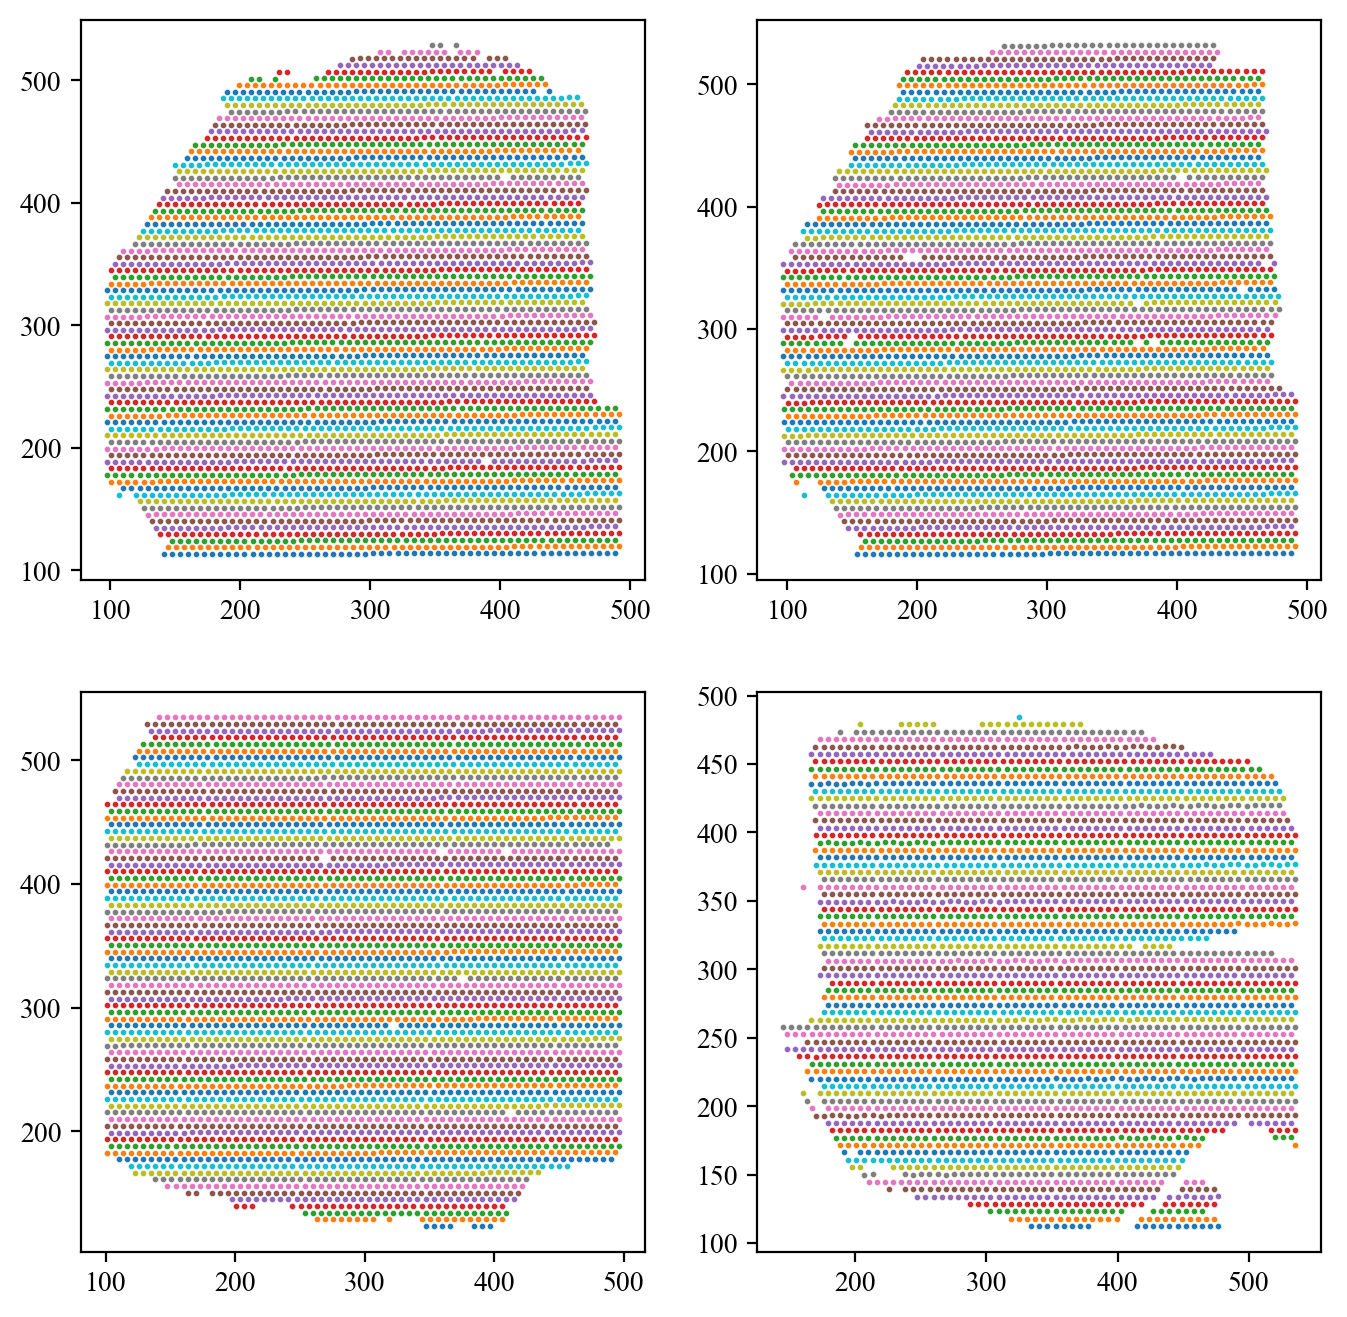

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
slice1.keys()
fig,ax = plt.subplots(2,2,dpi=200,figsize=(8,8))
for line in slice1['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[0][0])
for line in slice2['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[0][1])
for line in slice3['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[1][0])
for line in slice4['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[1][1])

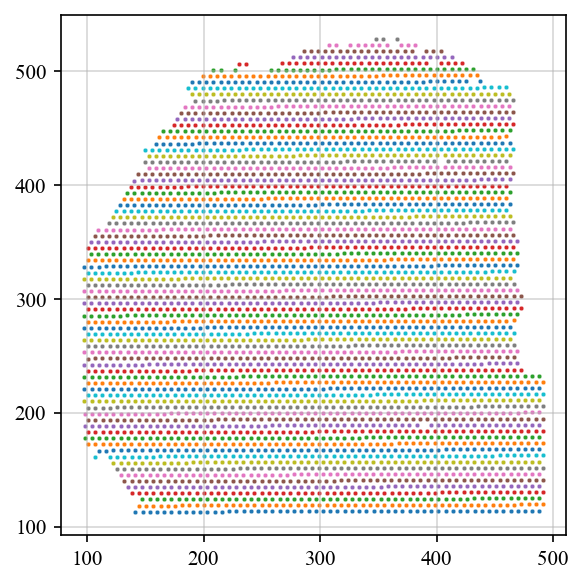

In [5]:
fig,ax = plt.subplots(1,dpi=150,figsize=(4,4))
plt.grid(alpha=0.5)
for line in slice1['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax)
plt.tight_layout()

plt.savefig('Figure/Split_on_y.png')

In [6]:
len(slice1['Position']),len(slice2['Position'])
slice1_pos = slice1['Position']
slice2_pos = slice2['Position']
scale_max=[min(np.max(slice1['Position'][i][:,0]),np.max(slice2['Position'][i][:,0])) for i in range(len(slice1['Position']))]
scale_min=[max(np.min(slice1['Position'][i][:,0]),np.min(slice2['Position'][i][:,0])) for i in range(len(slice1['Position']))]
scale = np.array(list(zip(scale_min,scale_max)))


In [7]:
slice1_pos = copy.deepcopy(slice1['Position'])
slice2_pos = copy.deepcopy(slice2['Position'])
values = [slice1_pos[0][i] for i in range(len(slice1_pos[0])) if scale[0][0]<= slice1_pos[0][i][0] <= scale[0][1]]
cutted_pos1 = []
cutted_pos2 = []
for n in range(len(slice1_pos)):
    cutted_pos1.append(np.array([slice1_pos[n][i] for i in range(len(slice1_pos[n])) if scale[n][0]<= slice1_pos[n][i][0] <= scale[n][1]]))
for n in range(len(slice2_pos)):
    cutted_pos2.append(np.array([slice2_pos[n][i] for i in range(len(slice2_pos[n])) if scale[n][0]<= slice2_pos[n][i][0] <= scale[n][1]]))


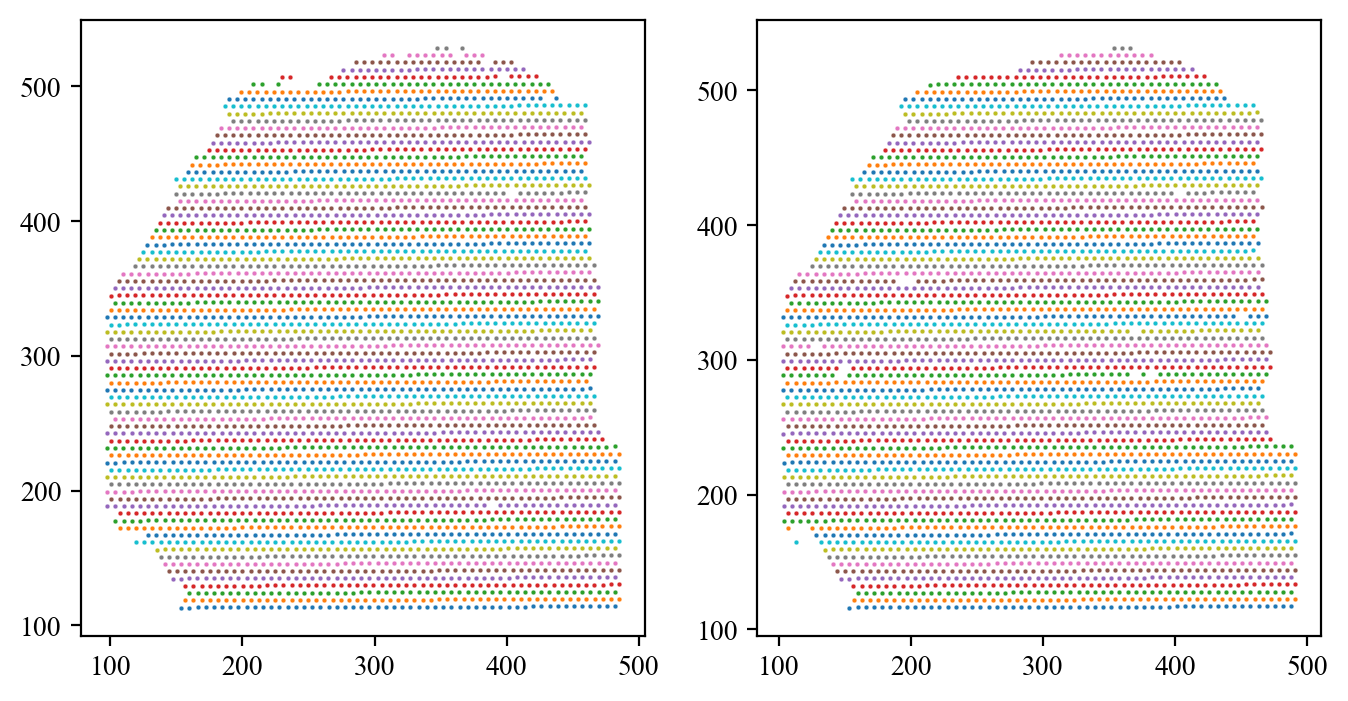

In [8]:
fig,ax = plt.subplots(1,2,dpi=200,figsize=(8,4))
for line in cutted_pos1:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=3,ax=ax[0])
for line in cutted_pos2:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=3,ax=ax[1])   

In [9]:
for i in range(len(cutted_pos1)):
    inter = min(len(cutted_pos1[i]),len(cutted_pos2[i]))
    print(np.allclose(cutted_pos1[i][:inter],cutted_pos2[i][:inter],0.3))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


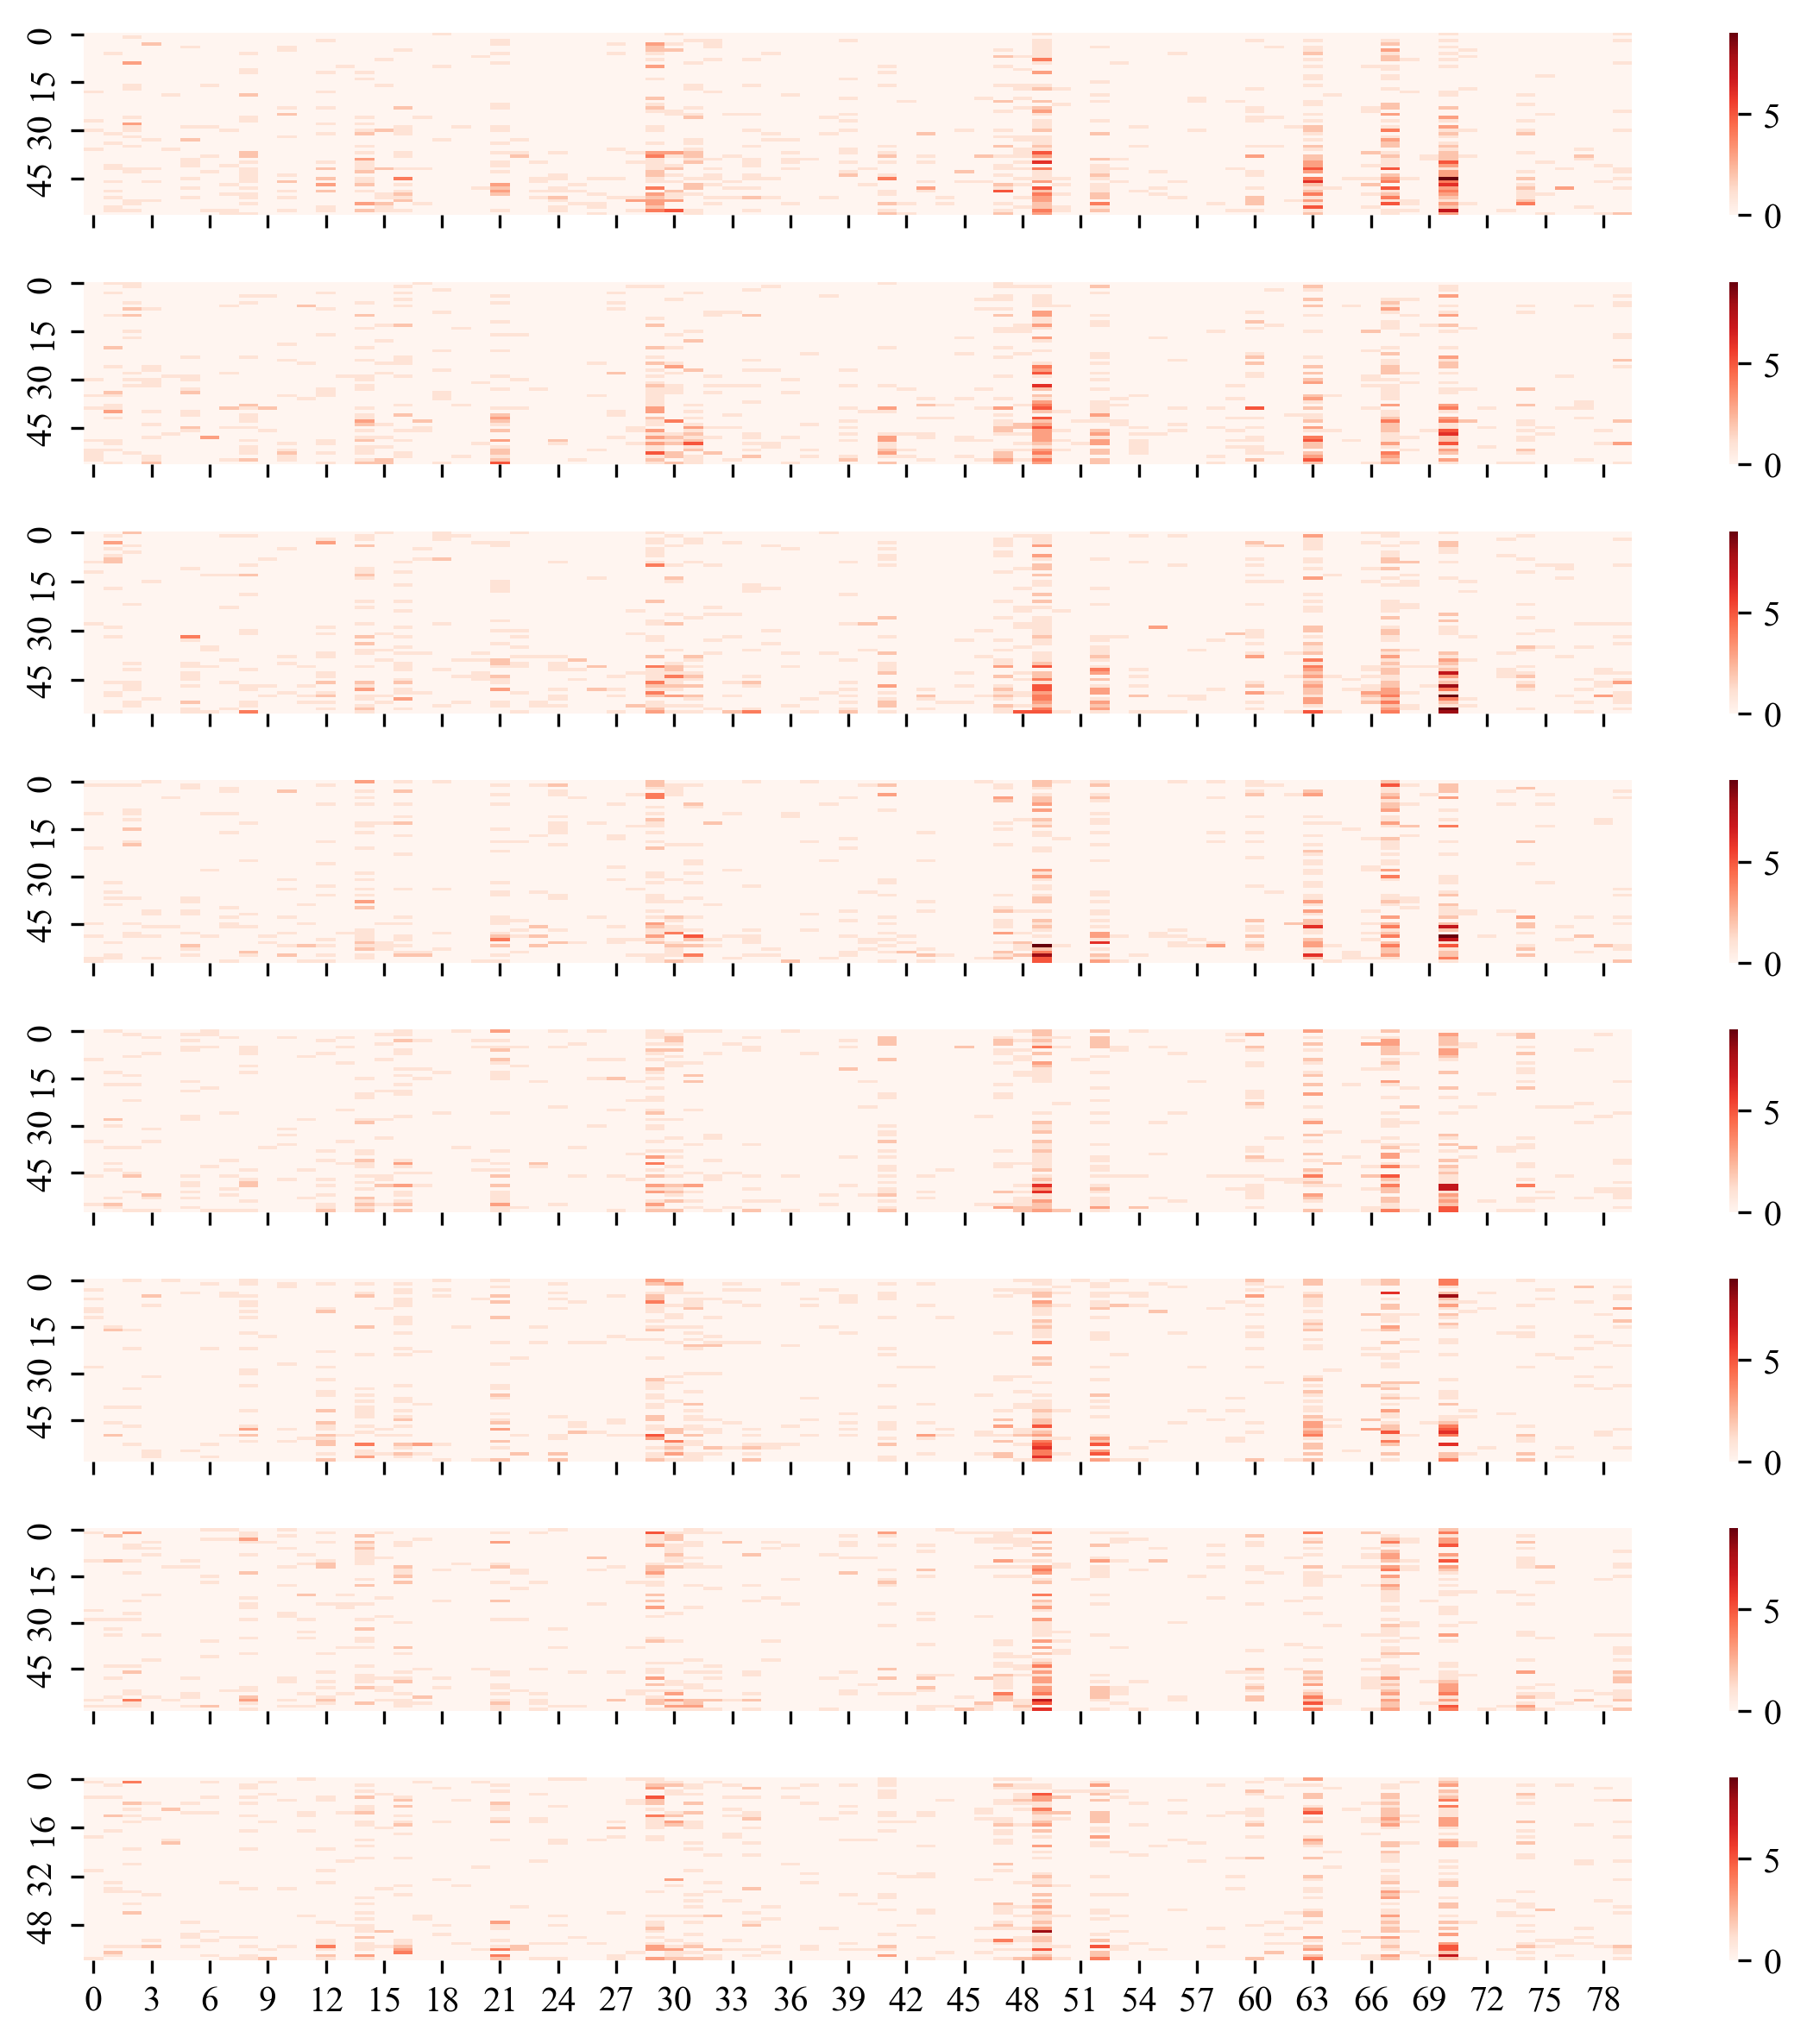

In [10]:

fig,ax = plt.subplots(8,1,dpi=300,figsize=[8,8],sharex=True)
for i in range(len(ax)):
    ax[i].set_xticks([])
    sns.heatmap(slice1['Gene_features'][i][:,:80],cmap='Reds',ax=ax[i],vmin=0,vmax=9)
plt.tight_layout()
#plt.savefig('H_slice')

In [11]:
sample_size=50
x, y = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
# 定义扭曲函数
def nonlinear_transformation(x, y):
    x_new = x ** 2 + y ** 2
    y_new = x * y
    return x_new, y_new

# 对网格进行扭曲
x_new, y_new = nonlinear_transformation(x, y)


In [12]:
x

array([[  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       ...,
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ]])

<Axes: >

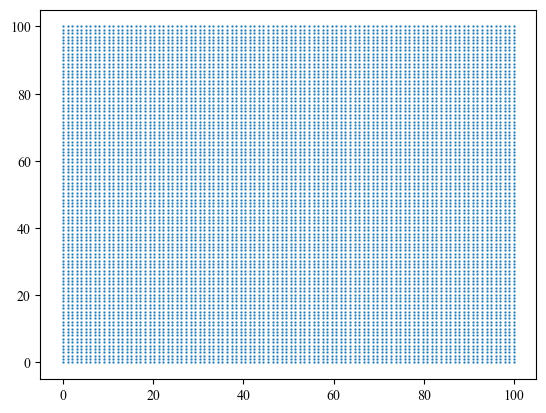

In [13]:
sns.scatterplot(x=np.squeeze(np.reshape(x,-1)),y=np.squeeze(np.reshape(y,-1)),s=3)

<Axes: >

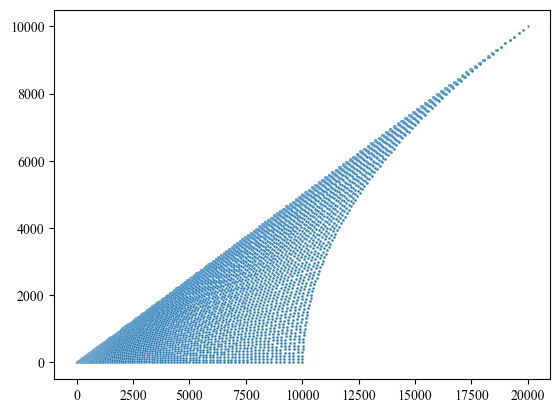

In [14]:
sns.scatterplot(x=np.squeeze(np.reshape(x_new,-1)),y=np.squeeze(np.reshape(y_new,-1)),s=3)

In [15]:
x, y = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
x_ = copy.deepcopy(x)
y_ = copy.deepcopy(y)
x_ += np.random.normal(0, 0.01, size=x.shape)
y_ += np.random.normal(0, 0.01, size=y.shape)
flatten = lambda x:x.reshape(-1)


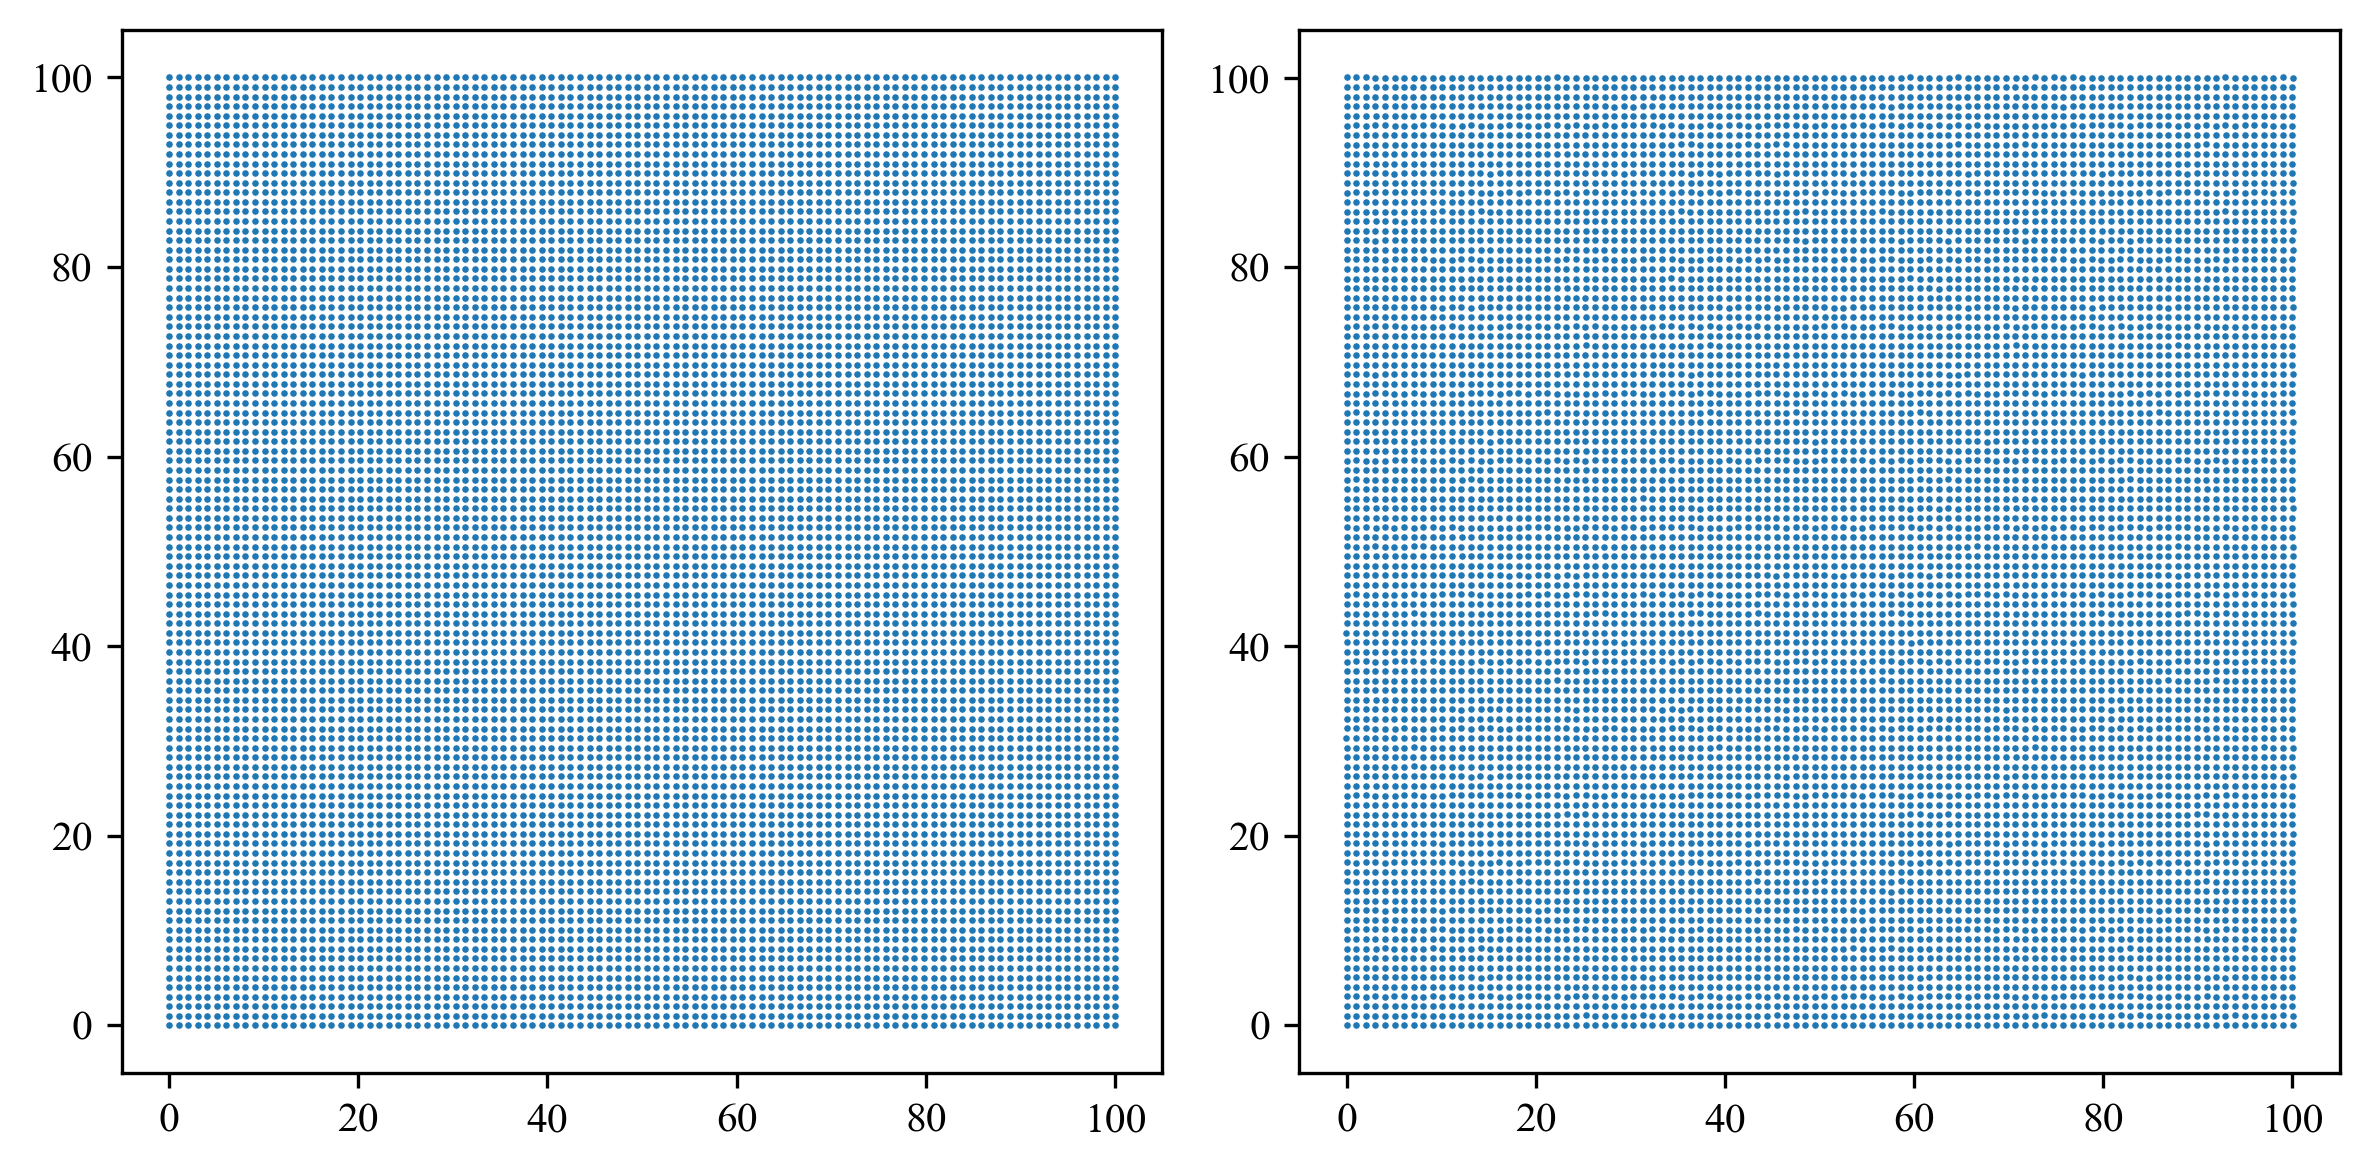

In [16]:
fig,ax = plt.subplots(1,2,dpi=300,figsize=[8,4])
sns.scatterplot(x=flatten(x),y=flatten(y),s=3,ax=ax[0])
sns.scatterplot(x=flatten(x_),y=flatten(y_),s=3,ax=ax[1])
plt.tight_layout()

In [17]:
slice1_pos[0] += np.random.uniform(-0.01, 0.01, size=slice1_pos[0].shape)

In [18]:
for i in range(len(slice1['Gene_features'])):
    print(slice1['Gene_features'][i].shape)


(57, 9219)
(57, 9219)
(56, 9219)
(58, 9219)
(58, 9219)
(59, 9219)
(59, 9219)
(60, 9219)
(60, 9219)
(62, 9219)
(62, 9219)
(64, 9219)
(64, 9219)
(64, 9219)
(63, 9219)
(64, 9219)
(64, 9219)
(64, 9219)
(64, 9219)
(64, 9219)
(64, 9219)
(64, 9219)
(64, 9219)
(61, 9219)
(61, 9219)
(60, 9219)
(61, 9219)
(60, 9219)
(60, 9219)
(60, 9219)
(60, 9219)
(60, 9219)
(61, 9219)
(61, 9219)
(61, 9219)
(61, 9219)
(61, 9219)
(60, 9219)
(60, 9219)
(60, 9219)
(61, 9219)
(60, 9219)
(60, 9219)
(60, 9219)
(60, 9219)
(59, 9219)
(58, 9219)
(57, 9219)
(56, 9219)
(55, 9219)
(55, 9219)
(54, 9219)
(54, 9219)
(53, 9219)
(53, 9219)
(53, 9219)
(51, 9219)
(50, 9219)
(51, 9219)
(52, 9219)
(50, 9219)
(49, 9219)
(49, 9219)
(48, 9219)
(47, 9219)
(47, 9219)
(46, 9219)
(45, 9219)
(45, 9219)
(45, 9219)
(40, 9219)
(39, 9219)
(32, 9219)
(27, 9219)
(23, 9219)
(19, 9219)
(11, 9219)
(3, 9219)


In [19]:
from sklearn.decomposition import PCA
def getPCA(slice_,dim=128):
    pca = PCA(n_components=dim)
    lenli = []
    for fea in slice_['Gene_features']:
        lenli.append(fea.shape[0])
    fea_map = np.concatenate(slice_['Gene_features'],axis=0)
    reduced_map = pca.fit_transform(fea_map)
    split_indices = np.cumsum(lenli)[:-1]
    split_data = np.split(reduced_map, split_indices)
    return split_data
#reduced_data = [pca.fit_transform(array) for array in slice1['Gene_features']]



In [20]:
reduced_slice1 = getPCA(slice1)

In [21]:
reduced_slice2 = getPCA(slice2)

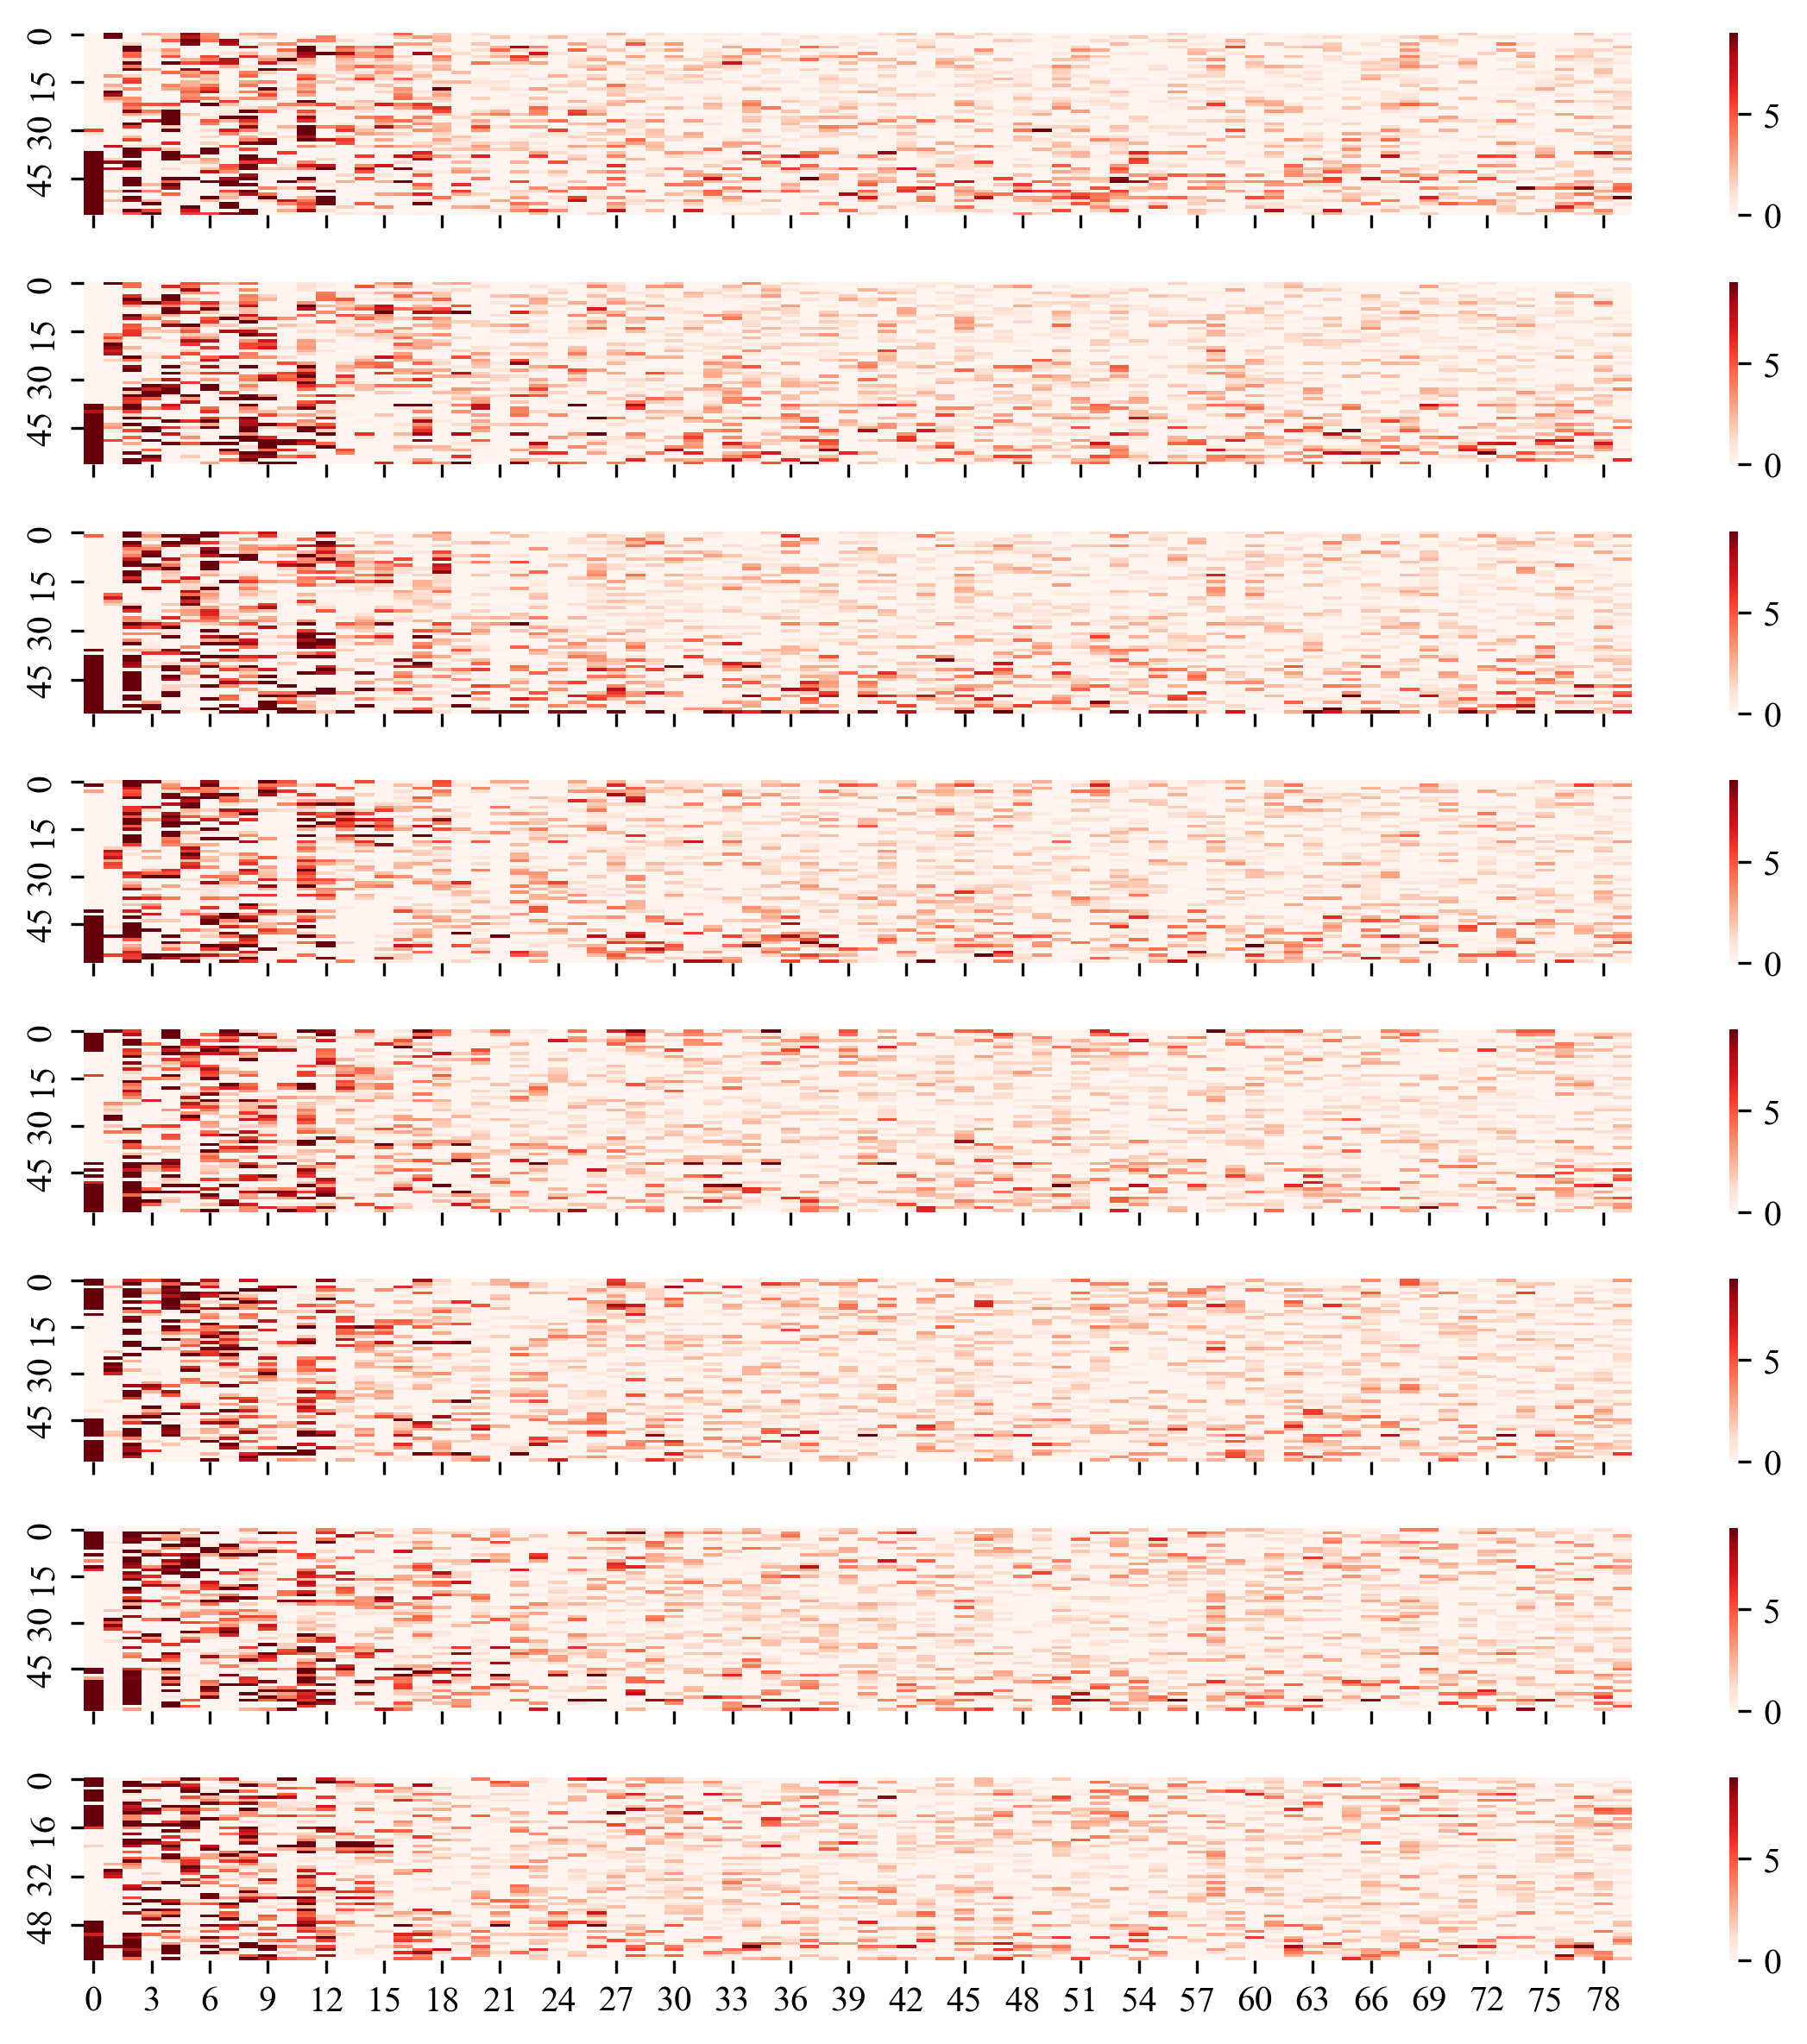

In [22]:
fig,ax = plt.subplots(8,1,dpi=300,figsize=[8,8],sharex=True)
for i in range(len(ax)):
    ax[i].set_xticks([])
    sns.heatmap(reduced_slice1[i][:,:80],cmap='Reds',ax=ax[i],vmin=0,vmax=9)
plt.tight_layout()
plt.savefig('PCA_reduced')

In [23]:
reduced_slice2[0].shape

(55, 128)

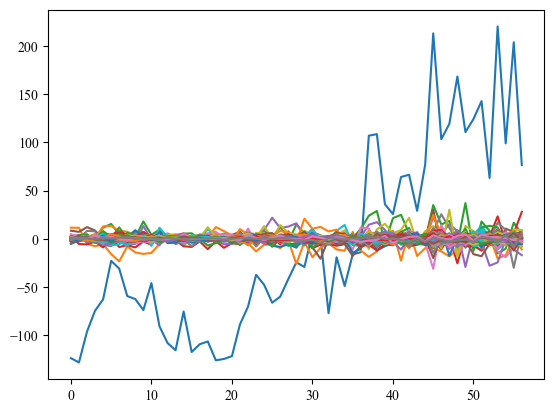

In [24]:
plt.plot(reduced_slice1[0][:,:])
plt.show()

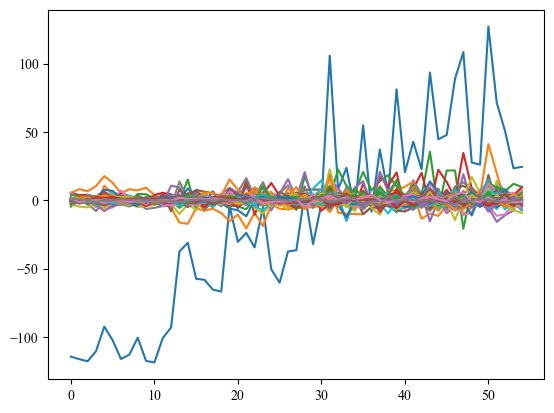

In [25]:
plt.plot(reduced_slice2[0][:,:])
plt.show()

In [26]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

In [27]:
euclidean_distance(reduced_slice1[0][:55],reduced_slice2[0])

608.9083216541947

In [28]:
from scipy.spatial.distance import cdist
def min_distance_offset(features1, features2):
    # 确保输入是numpy数组
    features1 = np.array(features1)
    features2 = np.array(features2)
    if len(features1) > len(features2):
        features1, features2 = features2, features1

    # 初始化最小距离为无穷大
    min_distance = np.inf
    min_offset = None
    if len(features2) - len(features1) > 5:
        return 0
    # 计算所有可能的偏移值
    for offset in range(len(features2) - len(features1) + 1):
        # 提取特征
        subset_features2 = features2[offset : offset + len(features1)]
        
        # 计算欧氏距离
        distance = np.sum(cdist(features1, subset_features2))
        #print(distance)
        # 如果当前距离小于最小距离，则更新最小距离和偏移值
        if distance < min_distance:
            min_distance = distance
            min_offset = offset

    return min_offset

In [29]:
len(reduced_slice1),len(reduced_slice2)

(78, 78)

<Axes: >

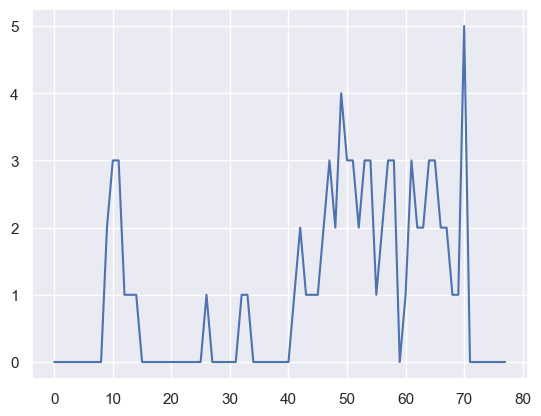

In [30]:
offset = [min_distance_offset(reduced_slice1[i],reduced_slice2[i]) for i in range(len(reduced_slice1))]
sns.set_theme()
sns.lineplot(data=offset)


In [31]:
np.concatenate(slice1['Position'],axis=0).shape

(4220, 2)

In [32]:
np.concatenate(slice1['Gene_features'],axis=0).shape

(4220, 9219)

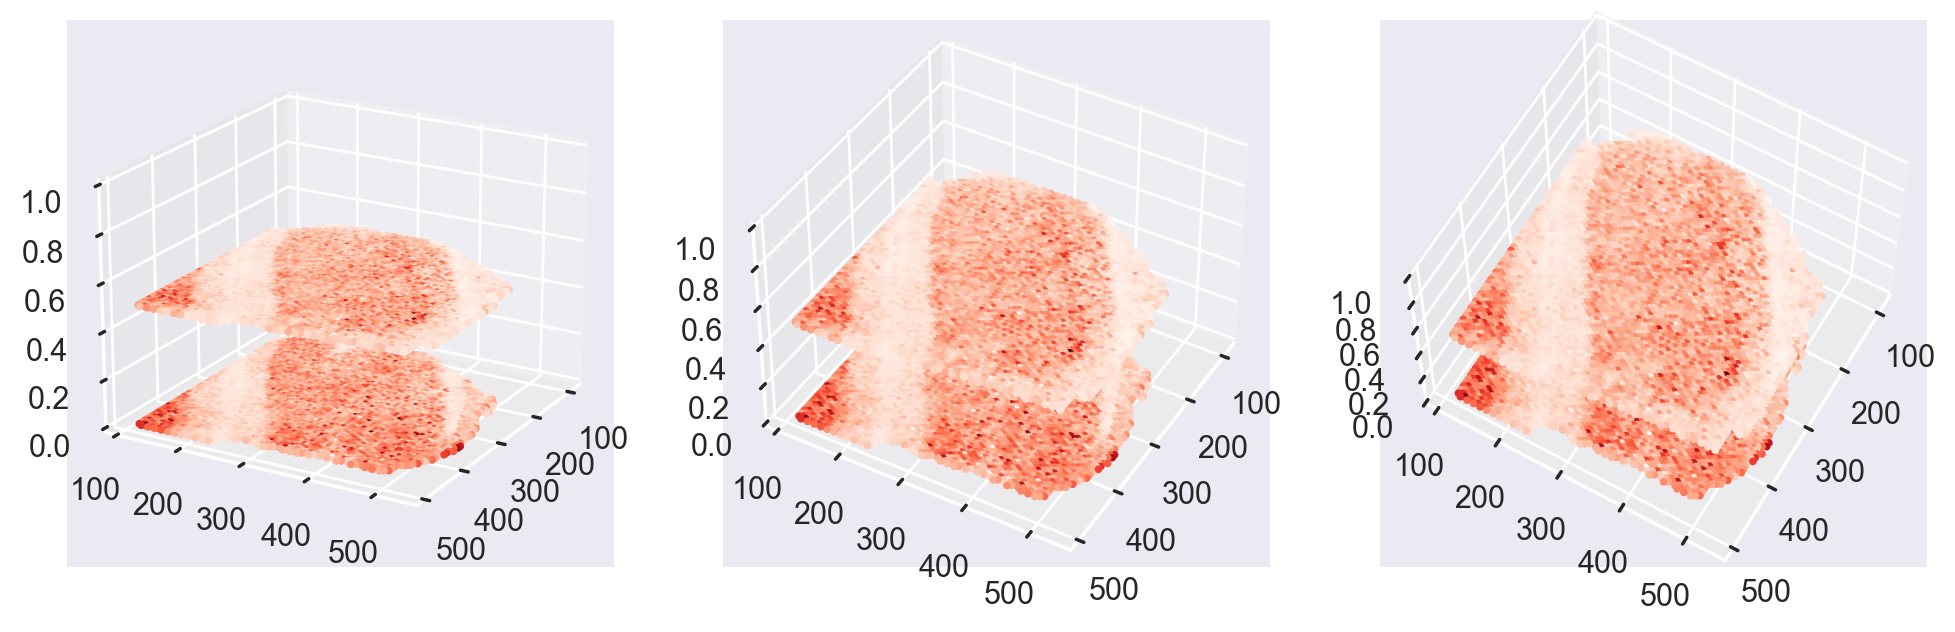

In [33]:
fig = plt.figure(figsize=[12, 4],dpi=200)
# First subplot
ax1 = fig.add_subplot(131, projection='3d')
xy = [np.concatenate(slice_['Position'],axis=0) for slice_ in [slice1,slice2,slice3,slice4]]
gene = [np.concatenate(slice_['Gene_features'],axis=0) for slice_ in [slice1,slice2,slice3,slice4]]
for i in range(2):
    ax1.scatter(xy[i][:,0],xy[i][:,1],i*0.5,c = np.mean(gene[i],axis=1),cmap='Reds',s=3,alpha=1)
ax1.set_zlim(0, 1)
ax1.view_init(elev=20, azim=30)

# Second subplot
ax2 = fig.add_subplot(132, projection='3d')
for i in range(2):
    ax2.scatter(xy[i][:,0],xy[i][:,1],i*0.5,c = np.mean(gene[i],axis=1),cmap='Reds',s=3,alpha=1)
ax2.set_zlim(0, 1)
ax2.view_init(elev=40, azim=30)

# Third subplot
ax3 = fig.add_subplot(133, projection='3d')
for i in range(2):
    ax3.scatter(xy[i][:,0],xy[i][:,1],i*0.5,c = np.mean(gene[i],axis=1),cmap='Reds',s=3,alpha=1)
ax3.set_zlim(0, 1)
ax3.view_init(elev=60, azim=30)

#plt.savefig('3Dshow')

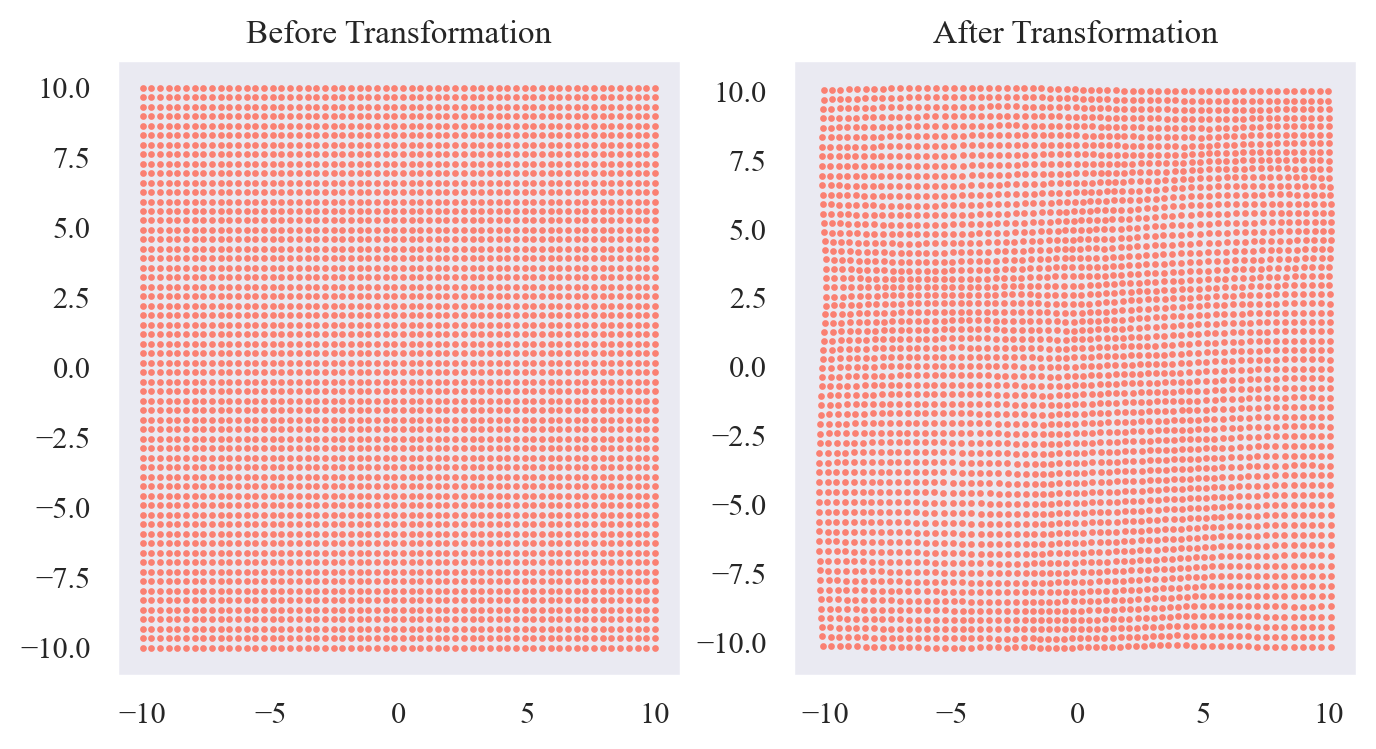

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
x = np.linspace(-10, 10, 60)
y = np.linspace(-10, 10, 60)
fig, ax = plt.subplots(1, 2, figsize=(8, 4),dpi=200)

X, Y = np.meshgrid(x, y)
# 变换前的散点图像
ax[0].scatter(X, Y, s=2,c='salmon')
ax[0].set_title('Before Transformation')
ax[0].grid()
def transform_points(X,Y,center, threshold, scale, ellipse_ratio):
    # 创建一个由点组成的网格


    # 计算每个点到中心点的距离
    distance = np.sqrt((X - center[0])**2 + (Y - center[1])**2 / ellipse_ratio**2)

    # 对距离中心点在阈值范围内的点进行坐标变换
    mask = distance <= threshold
    weights = 1 - distance[mask] / threshold  # 距离中心点越近，权重越大
    X[mask] = X[mask] + scale * weights * (X[mask] - center[0])
    Y[mask] = Y[mask] + scale * weights * (Y[mask] - center[1])

    return X, Y

# 选择一个中心点
center = [0, 0]

# 设置阈值和缩放因子
threshold = 4
scale = 0.03

# 设置椭圆比例
ellipse_ratio = 2
# 获取变换后的点
X_transformed, Y_transformed = transform_points(X,Y,center, 8, scale, 1.4)
X_transformed, Y_transformed = transform_points(X_transformed, Y_transformed,[5,5], 6, 0.1, 0.5)
X_transformed, Y_transformed = transform_points(X_transformed, Y_transformed,[-5,7.5], 7, 0.1, 0.75)
X_transformed, Y_transformed = transform_points(X_transformed, Y_transformed,[-5,-5], 11, 0.1, 0.75)
X_transformed, Y_transformed = transform_points(X_transformed, Y_transformed,[9,-8], 11, 0.1, 1.6)



# 绘制变换前和变换后的散点图像



# 变换后的散点图像
ax[1].scatter(X_transformed, Y_transformed, s=2,c='salmon')
ax[1].set_title('After Transformation')
ax[1].grid()

#plt.savefig('WrappingSimulation')


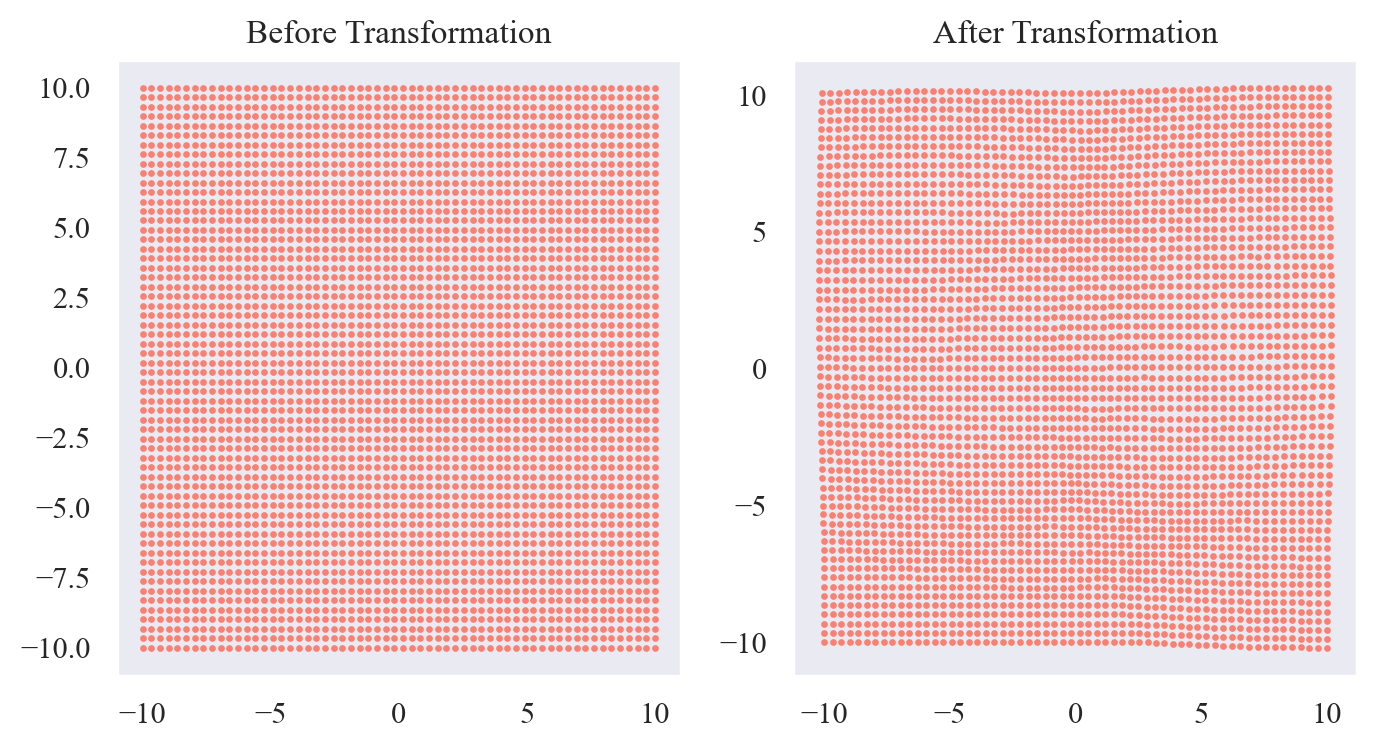

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Set the font family
plt.rcParams["font.family"] = "Times New Roman"

# Create a grid of points
x = np.linspace(-10, 10, 60)
y = np.linspace(-10, 10, 60)
X, Y = np.meshgrid(x, y)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

# Plot the original points
ax[0].scatter(X, Y, s=2, c='salmon')
ax[0].set_title('Before Transformation')
ax[0].grid()

def transform_points(X, Y, center, threshold, scale, ellipse_ratio):
    # Calculate the distance of each point to the center
    distance = np.sqrt((X - center[0])**2 + (Y - center[1])**2 / ellipse_ratio**2)

    # Transform the points within the threshold distance
    mask = distance <= threshold
    weights = 1 - distance[mask] / threshold  # Closer points get higher weights
    X[mask] = X[mask] + scale * weights * (X[mask] - center[0])
    Y[mask] = Y[mask] + scale * weights * (Y[mask] - center[1])

    return X, Y

# Set the parameters for the transformation
np.random.seed(0)  # For reproducibility
num_transformations = np.random.randint(3,8)
for _ in range(num_transformations):
    center = np.random.normal(0, 5, size=2)  # Center coordinates from N(0, 5)
    threshold = np.random.normal(10, 2)  # Threshold from N(10, 2)
    scale = np.random.normal(0.04, 0.02)  # Scale factor from N(0.1, 0.02)
    ellipse_ratio = np.random.normal(1, 0.2)  # Ellipse ratio from N(1, 0.2)

    # Apply the transformation
    X, Y = transform_points(X, Y, center, threshold, scale, ellipse_ratio)

# Plot the transformed points
ax[1].scatter(X, Y, s=2, c='salmon')
ax[1].set_title('After Transformation')
ax[1].grid()

# Show the plot
plt.show()
